<a href="https://colab.research.google.com/github/Bartup/MIW/blob/main/gr16_s23591_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


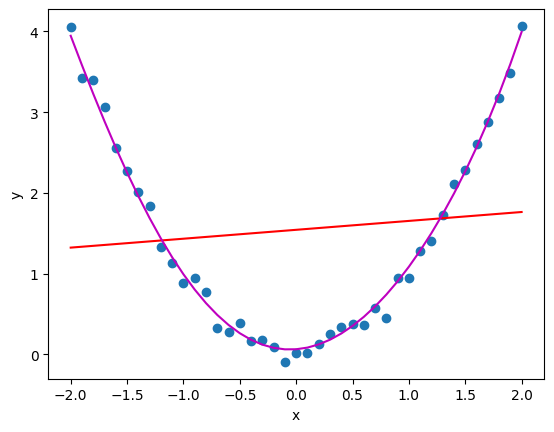

6.39 : Linear regression mean absolute percentage error
-0.02 : Linear r2 score

0.29 : Non-linear regression mean absolute percentage error
0.99 : Nonlinear r2 score

Non linear regression is  2216.83% better than linear one 


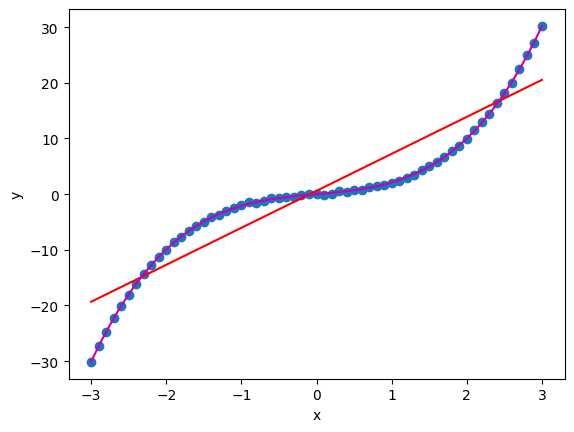

3.03 : Linear regression mean absolute percentage error
0.88 : Linear r2 score

0.19 : Non-linear regression mean absolute percentage error
1.00 : Nonlinear r2 score

Non linear regression is  1606.64% better than linear one 


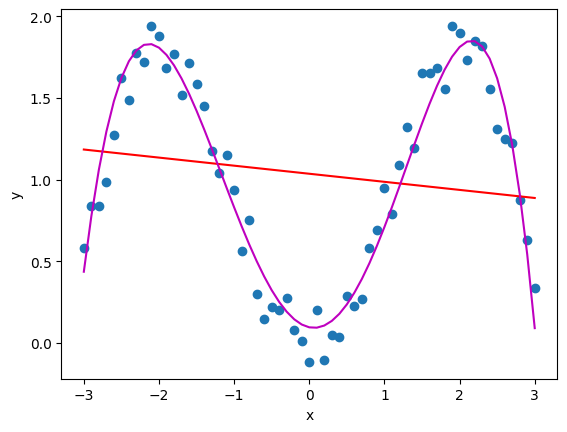

3.72 : Linear regression mean absolute percentage error
-0.01 : Linear r2 score

0.50 : Non-linear regression mean absolute percentage error
0.94 : Nonlinear r2 score

Non linear regression is  741.81% better than linear one 


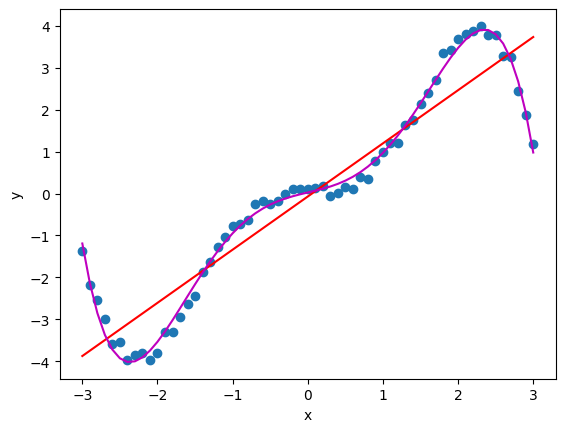

48.20 : Linear regression mean absolute percentage error
0.88 : Linear r2 score

13.95 : Non-linear regression mean absolute percentage error
0.99 : Nonlinear r2 score

Non linear regression is  345.45% better than linear one 


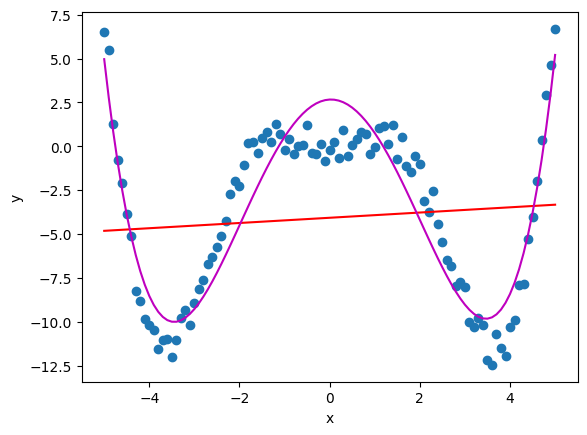

7.10 : Linear regression mean absolute percentage error
-0.01 : Linear r2 score

3.03 : Non-linear regression mean absolute percentage error
0.86 : Nonlinear r2 score

Non linear regression is  234.10% better than linear one 


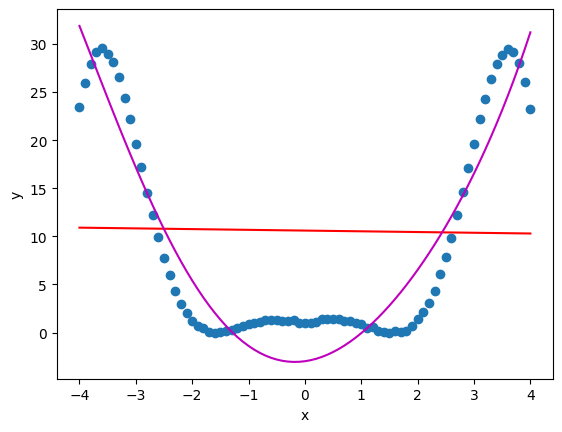

64.15 : Linear regression mean absolute percentage error
-0.01 : Linear r2 score

16.28 : Non-linear regression mean absolute percentage error
0.89 : Nonlinear r2 score

Non linear regression is  393.90% better than linear one 


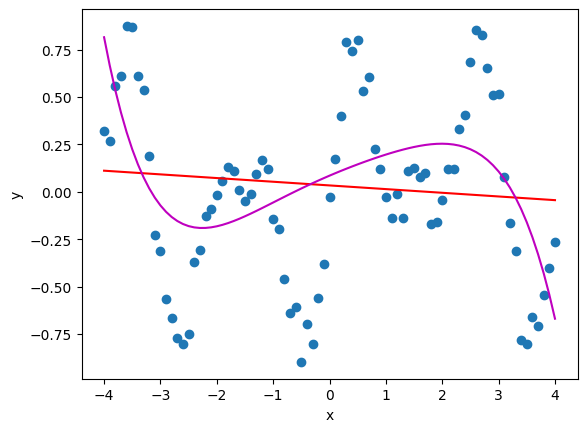

1.22 : Linear regression mean absolute percentage error
-0.01 : Linear r2 score

1.96 : Non-linear regression mean absolute percentage error
0.28 : Nonlinear r2 score

Non linear regression is  62.42% better than linear one 


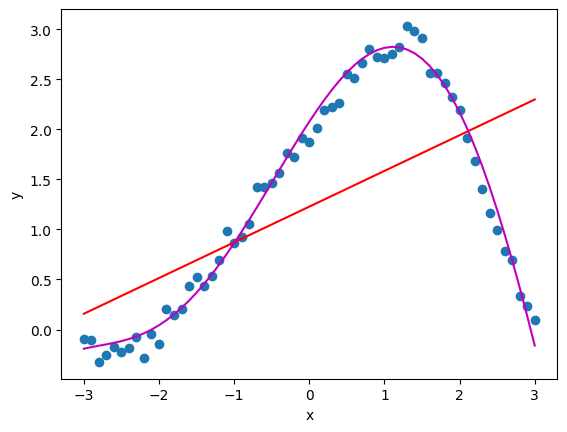

1.73 : Linear regression mean absolute percentage error
0.35 : Linear r2 score

0.24 : Non-linear regression mean absolute percentage error
0.99 : Nonlinear r2 score

Non linear regression is  733.85% better than linear one 


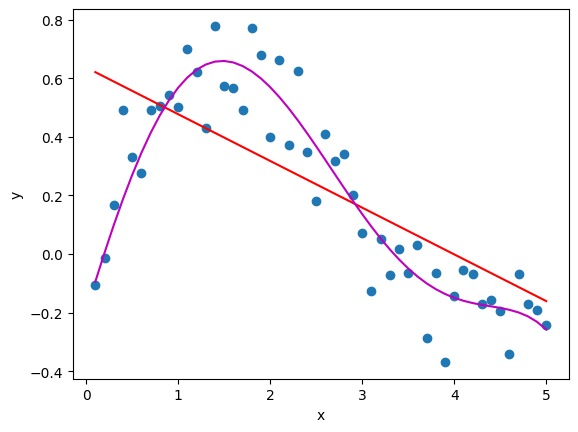

1.89 : Linear regression mean absolute percentage error
0.50 : Linear r2 score

0.53 : Non-linear regression mean absolute percentage error
0.88 : Nonlinear r2 score

Non linear regression is  355.34% better than linear one 


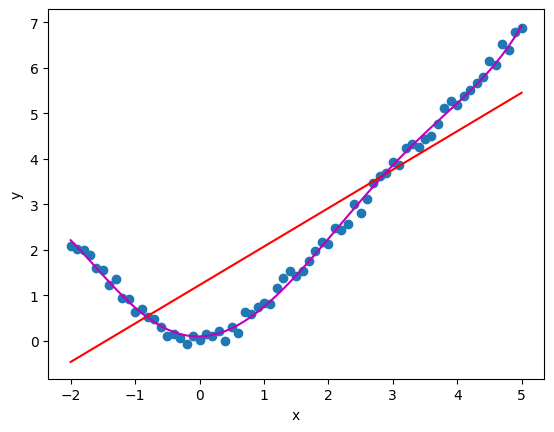

11.27 : Linear regression mean absolute percentage error
0.74 : Linear r2 score

1.14 : Non-linear regression mean absolute percentage error
1.00 : Nonlinear r2 score

Non linear regression is  987.21% better than linear one 


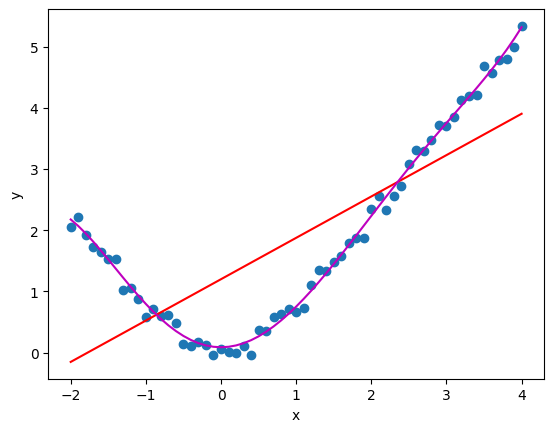

17.42 : Linear regression mean absolute percentage error
0.59 : Linear r2 score

1.56 : Non-linear regression mean absolute percentage error
0.99 : Nonlinear r2 score

Non linear regression is  1116.89% better than linear one 


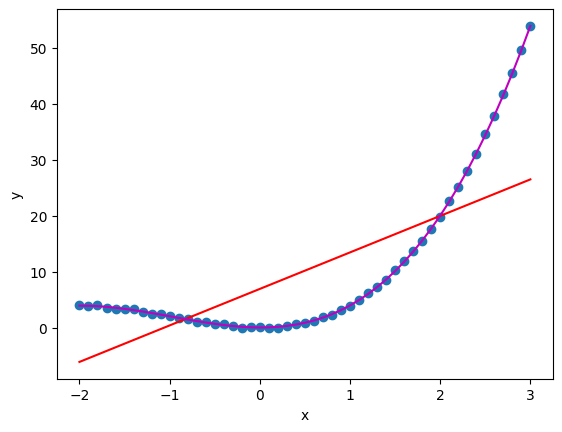

12.57 : Linear regression mean absolute percentage error
0.59 : Linear r2 score

0.24 : Non-linear regression mean absolute percentage error
1.00 : Nonlinear r2 score

Non linear regression is  5212.55% better than linear one 


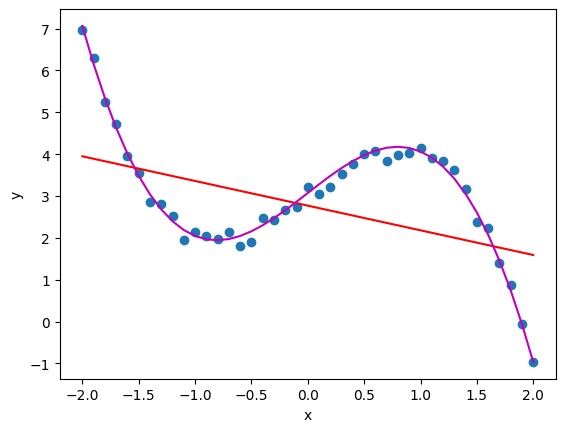

1.11 : Linear regression mean absolute percentage error
0.15 : Linear r2 score

0.05 : Non-linear regression mean absolute percentage error
0.99 : Nonlinear r2 score

Non linear regression is  2362.42% better than linear one 


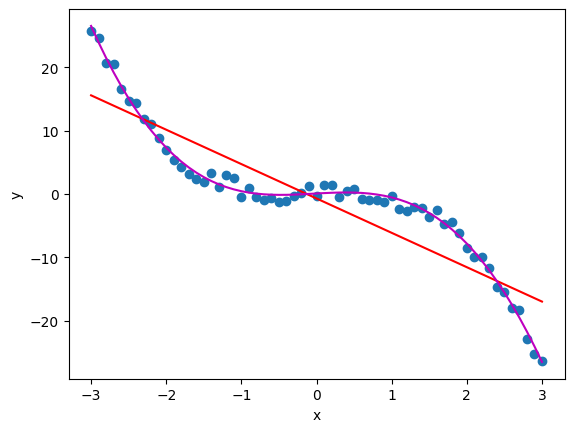

2.25 : Linear regression mean absolute percentage error
0.81 : Linear r2 score

0.46 : Non-linear regression mean absolute percentage error
0.99 : Nonlinear r2 score

Non linear regression is  492.79% better than linear one 


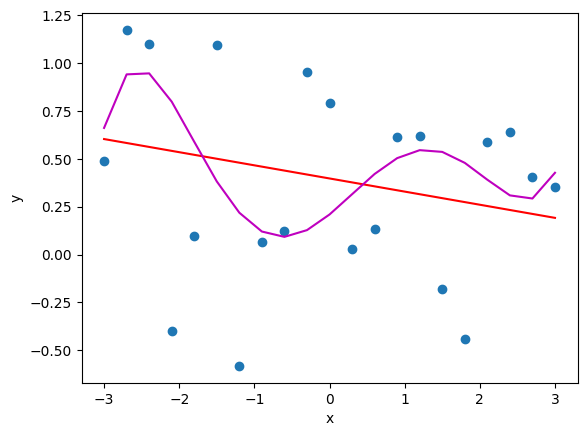

1.99 : Linear regression mean absolute percentage error
0.01 : Linear r2 score

1.61 : Non-linear regression mean absolute percentage error
-0.06 : Nonlinear r2 score

Non linear regression is  123.59% better than linear one 


In [67]:

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


for n in range(15):
  file = open("/content/drive/MyDrive/MIW/Dane/dane{}.txt".format(n + 1), "r")

  X = []
  y = []
  for x in file:
    point = x.split(" ")
    point.remove('\n')
    X.append(float(point[0]))
    y.append(float(point[1]))

  X = np.array(X)
  y = np.array(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
  y_preds = reg.predict(X.reshape(-1, 1))
  linear_accuracy = mean_absolute_percentage_error(y, y_preds)
  linear_r2 = r2_score(y, y_preds)

  #Drugi model 

  poly = PolynomialFeatures(degree=5, include_bias=False)
  poly_features = poly.fit_transform(X_train.reshape(-1, 1))

  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, y_train)
  poly_all = poly.fit_transform(X.reshape(-1, 1))

  y_predicted = poly_reg_model.predict(poly_all)

  nonlinear_accuracy = mean_absolute_percentage_error(y, y_predicted)
  nonlinear_r2 = r2_score(y, y_predicted)

  plt.scatter(X,y)
  ax = plt.gca()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.plot(X, y_preds, c='r')
  plt.plot(X, y_predicted, c="m")
  plt.show()

  print('{0:.2f}'.format(linear_accuracy) + " : Linear regression mean absolute percentage error")
  print('{0:.2f}'.format(linear_r2) + " : Linear r2 score")
  print()
  print('{0:.2f}'.format(nonlinear_accuracy) + " : Non-linear regression mean absolute percentage error")
  print('{0:.2f}'.format(nonlinear_r2) + " : Nonlinear r2 score")
  print()
  print("Non linear regression is  " + '{0:.2f}'.format((linear_accuracy / nonlinear_accuracy) * 100) + "% better than linear one ")